# 1. Import libraries and data

In [1]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# formatting  df display
pd.options.display.float_format = '{:,.2f}'.format  # 2 decimals, comma as thousands separator

In [3]:
# get_path = os.path.abspath("")
project_path = "d:\\PYTHON\\CS_Bootcamp\\programs\\cs-intrusion-detection-system"

# add path to load own functions from .py files in scrips folder
sys.path.insert(0, project_path + '\scripts')

from preprocessing import *
from plotting import *

In [4]:
# constants and names 
file_name_train_data = "KDDTrain+.txt"
file_name_test_tata = "KDDTest+.txt"

#  column names
column_names = [
    "duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted",
    "num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count",
    "srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "attack_type",
    "difficulty_level"
]

# custom colors for palette
COLOR_1 = 'steelblue'
COLOR_2 =  '#E42A38'

In [5]:
# load data as df
train_data = pd.read_csv("../data/"+ file_name_train_data,  names=column_names)
test_data = pd.read_csv("../data/"+ file_name_test_tata, names=column_names)

In [6]:
# Dimensions of dfs
print(f'The training data frame has {train_data.shape[0]} rows and {train_data.shape[1]} columns.')
print(f'The test data frame has {test_data.shape[0]} rows and {test_data.shape[1]} columns.')
train_data.head()

The training data frame has 125973 rows and 43 columns.
The test data frame has 22544 rows and 43 columns.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


# 2. Data cleaning

In [7]:
# Check missing values
na_train = train_data.isna().sum().sum()
na_test = test_data.isna().sum().sum()
print(f'There are {na_train} missing values in the training data and {na_test} missing values in the test data.')


There are 0 missing values in the training data and 0 missing values in the test data.


In [8]:
# Check duplicated values
dupes_train = train_data.duplicated().sum()
dupes_test = test_data.duplicated().sum()
print(f'There are {dupes_train} duplicated values in the train data and {dupes_test} duplicated values in the test data.')

There are 0 duplicated values in the train data and 0 duplicated values in the test data.


# 3.  Check data types 
**Goal**: convert categorical variables to categorical data types</br>
Workflow:
- inspect data types with `.info()`
- count number of unique values with `.nunique()`
- inspect occurences of unique values with `.value_counts()`
- get unique values with `.unique()`

In [9]:
# categorize features for further processing, add them during EDA
# use set to keep items unique)
drop_features = set([])
bool_features = set([])
cat_features = set([])
num_features = set([])
recode_features = set([])
target_features = set([])

In [10]:
# Check variable types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [11]:
# getting unique values for each column to get an idea about numerical/categorical features
train_data.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [12]:
# numerical feature
print(train_data.duration.describe())
num_features.add("duration")

count   125,973.00
mean        287.14
std       2,604.52
min           0.00
25%           0.00
50%           0.00
75%           0.00
max      42,908.00
Name: duration, dtype: float64


In [13]:
# objects: protocol_type --> convert to cat 
print(train_data.protocol_type.value_counts())
cat_features.add("protocol_type")

protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64


In [14]:
# objects: service --> convert to cat 
print(train_data.service.unique())
cat_features.add("service")

['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']


In [15]:
# objects: flag  --> convert to cat 
print(train_data.flag.value_counts())
cat_features.add("flag")

flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64


In [16]:
# numerical features bytes  
scale = 1e6  # convert bytes to MB (= 1 original bytes, 1e3 = KB,  1e9 = GB)
train_data[["src_bytes", "dst_bytes"]].describe() /scale # for display only 

,src_bytes,dst_bytes
count,0.13,0.13
mean,0.05,0.02
std,5.87,4.02
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,0.00,0.00
max,"1,379.96","1,309.94"


In [17]:
num_features.add("src_bytes")
num_features.add("dst_bytes")

In [18]:
# bool : connection from/ to same host 
print(train_data.land.value_counts())
bool_features.add("land")

land
0    125948
1        25
Name: count, dtype: int64


In [19]:
# nr of wrong fragments is either 0, 1 or 3 --> recode as category?
print(train_data.wrong_fragment.value_counts())
recode_features.add("wrong_fragment")

wrong_fragment
0    124883
3       884
1       206
Name: count, dtype: int64


In [20]:
# nr of urgent packets is mostly 0 -->  regroup  as category with x>0 vs "other"
print(train_data.urgent.value_counts())
recode_features.add("urgent") #  later recode 

urgent
0    125964
1         5
2         3
3         1
Name: count, dtype: int64


In [21]:
# nr of hot indicators 
print(train_data.hot.value_counts()) # --> numerical
num_features.add("hot")

hot
0     123302
2       1037
1        369
28       277
30       256
4        173
6        140
5         76
24        68
19        57
22        55
3         54
18        45
14        30
20         9
7          5
15         4
11         3
9          2
25         2
44         2
17         1
77         1
12         1
10         1
8          1
21         1
33         1
Name: count, dtype: int64


In [22]:
# mostly 0 --> recoding everything other than 0 to other category ? RECODE
print(train_data.num_failed_logins.value_counts())
recode_features.add("num_failed_logins")

num_failed_logins
0    125851
1       104
2         9
3         5
4         3
5         1
Name: count, dtype: int64


In [23]:
print(train_data.logged_in.value_counts())
bool_features.add("logged_in")

logged_in
0    76121
1    49852
Name: count, dtype: int64


In [24]:
# nr of compromized consitions, mostly 0 --> look at dist and RECODE?
print(train_data.num_compromised.value_counts())
recode_features.add("num_compromised")

num_compromised
0      124687
1         976
2          98
4          40
3          38
        ...  
568         1
349         1
452         1
375         1
11          1
Name: count, Length: 88, dtype: int64


In [25]:
train_data.num_compromised.describe()# --> look at dist and RECODE?

count   125,973.00
mean          0.28
std          23.94
min           0.00
25%           0.00
50%           0.00
75%           0.00
max       7,479.00
Name: num_compromised, dtype: float64

In [26]:
print(train_data.root_shell.value_counts())
bool_features.add("root_shell")

root_shell
0    125804
1       169
Name: count, dtype: int64


In [27]:
print(train_data.su_attempted.value_counts()) # recode as cat?
recode_features.add("su_attempted")

su_attempted
0    125893
2        59
1        21
Name: count, dtype: int64


In [36]:
# num features with skewed distribution - look at values counts (most freq values more than 99,5?)
train_data[["num_root", "num_file_creations" , "num_shells", "num_access_files", "num_outbound_cmds"]].describe()

,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds
count,"125,973.00","125,973.00","125,973.00","125,973.00","125,973.00"
mean,0.30,0.01,0.00,0.00,0.00
std,24.40,0.48,0.02,0.10,0.00
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00
max,"7,468.00",43.00,2.00,9.00,0.00


In [37]:
print(train_data.num_root.value_counts()) # seems like a case for recoding?, look at dist 
recode_features.add("num_root")


num_root
0      125324
1         273
9         121
6          99
2          33
        ...  
287         1
626         1
387         1
505         1
425         1
Name: count, Length: 82, dtype: int64


In [30]:
print(train_data.num_file_creations.value_counts()) # seems like a case for recoding 
recode_features.add("num_file_creations")

num_file_creations
0     125686
1        151
2         41
4         13
8          5
15         5
5          5
17         5
3          5
10         5
11         4
12         4
7          4
18         4
40         3
25         3
14         3
20         3
6          3
26         3
9          2
23         2
13         2
21         1
29         1
19         1
27         1
28         1
16         1
38         1
33         1
22         1
43         1
36         1
34         1
Name: count, dtype: int64


In [31]:
print(train_data.num_shells.value_counts()) # --> rocode to 0 and "other?"
recode_features.add("num_shells")

num_shells
0    125926
1        42
2         5
Name: count, dtype: int64


In [32]:
print(train_data.num_access_files.value_counts()) # --> rocode feature?"
recode_features.add("num_access_files")

num_access_files
0    125602
1       313
2        29
3         8
5         6
4         5
6         4
8         3
7         2
9         1
Name: count, dtype: int64


In [33]:
# disregard this feature - no information here only 0 value 
print(train_data.num_outbound_cmds.value_counts())
drop_features.add("num_outbound_cmds")      


num_outbound_cmds
0    125973
Name: count, dtype: int64


In [38]:
train_data[["is_host_login", "is_guest_login"]].value_counts().reset_index()
# interesting, most of the time it is neither host nor guest login, and only 1 host login xD

,is_host_login,is_guest_login,count
0,0,0,124785
1,0,1,1187
2,1,0,1


In [39]:
bool_features.add("is_host_login")
bool_features.add("is_guest_login")

In [40]:
# nr of conn to same host, same service,  nr of dest host accessed, count of conn to same service at dest
train_data[["count", "srv_count", "dst_host_count", "dst_host_srv_count"]].describe()

,count,srv_count,dst_host_count,dst_host_srv_count
count,"125,973.00","125,973.00","125,973.00","125,973.00"
mean,84.11,27.74,182.15,115.65
std,114.51,72.64,99.21,110.70
min,0.00,0.00,0.00,0.00
25%,2.00,2.00,82.00,10.00
50%,14.00,8.00,255.00,63.00
75%,143.00,18.00,255.00,255.00
max,511.00,511.00,255.00,255.00


In [41]:
num_features.add("count")
num_features.add("srv_count")
num_features.add("dst_host_count")
num_features.add("dst_host_srv_count")

In [42]:
# percentage SYN or REJ errors 
# varies between 0 and 1
train_data[["serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate"]].describe()

,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate
count,"125,973.00","125,973.00","125,973.00","125,973.00"
mean,0.28,0.28,0.12,0.12
std,0.45,0.45,0.32,0.32
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00
75%,1.00,1.00,0.00,0.00
max,1.00,1.00,1.00,1.00


In [43]:
# add all features with "rate" in their name to numerical features 
for col in train_data.columns:
    if "rate" in col:
        num_features.add(col)

In [44]:
# categories or numerical? -> use as 22 categories for now
print(train_data.difficulty_level.value_counts())
cat_features.add("difficulty_level")

difficulty_level
21    62557
18    20667
20    19339
19    10284
15     3990
17     3074
16     2393
12      729
14      674
11      641
13      451
10      253
9       194
7       118
8       106
6        96
5        81
4        79
0        66
3        65
1        62
2        54
Name: count, dtype: int64


In [45]:
# target variable (own category)
print(train_data.attack_type.value_counts())
target_features.add("attack_type")

attack_type
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


In [48]:
# check if I categozied all features so far 

list_bool_feat = list(bool_features)
list_cat_feat = list(cat_features)
list_drop_feat = list(drop_features)
list_num_feat = list(num_features)
list_recode_feat = list (recode_features)
list_target_feat = list(target_features)

categorized = list_bool_feat + list_cat_feat + list_drop_feat + list_num_feat + list_recode_feat + list_target_feat
categorized

for col in train_data.columns:
    if col not in categorized:
        print(col) # features not categorized
    
    #print("All features categorized for further processing.")

In [49]:
# features for recoding 
list_recode_feat

['urgent',
 'num_file_creations',
 'num_shells',
 'wrong_fragment',
 'num_root',
 'num_access_files',
 'num_failed_logins',
 'num_compromised',
 'su_attempted']

In [ ]:
# convert categorical features to category
train_data = convert_column_type(train_data, list_cat_feat + list_bool_feat + list_target_feat , 'category') 

# drop features 
train_data.drop(list_drop_feat, axis=1, inplace=True, errors="ignore") # ignores if col to drop doen not exist

# check conversions
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     125973 non-null  int64   
 1   protocol_type                125973 non-null  category
 2   service                      125973 non-null  category
 3   flag                         125973 non-null  category
 4   src_bytes                    125973 non-null  int64   
 5   dst_bytes                    125973 non-null  int64   
 6   land                         125973 non-null  category
 7   wrong_fragment               125973 non-null  int64   
 8   urgent                       125973 non-null  int64   
 9   hot                          125973 non-null  int64   
 10  num_failed_logins            125973 non-null  int64   
 11  logged_in                    125973 non-null  category
 12  num_compromised              125973 non-null

# 4. EDA - data exploration

## 4.1  Target variable `attack_type` 
- What is the overall rate of normal vs malicous network traffic?

In [51]:
df_attack_type_proportions = train_data.attack_type.value_counts(normalize=True).reset_index()
df_normal_attacks = df_attack_type_proportions[df_attack_type_proportions.attack_type == "normal"].proportion * 100

print(f"In the training data there is {round(df_normal_attacks.values[0],2)} % normal network traffic.\n")
print(df_attack_type_proportions)

In the training data there is 53.46 % normal network traffic.

        attack_type  proportion
0            normal        0.53
1           neptune        0.33
2             satan        0.03
3           ipsweep        0.03
4         portsweep        0.02
5             smurf        0.02
6              nmap        0.01
7              back        0.01
8          teardrop        0.01
9       warezclient        0.01
10              pod        0.00
11     guess_passwd        0.00
12  buffer_overflow        0.00
13      warezmaster        0.00
14             land        0.00
15             imap        0.00
16          rootkit        0.00
17       loadmodule        0.00
18        ftp_write        0.00
19         multihop        0.00
20              phf        0.00
21             perl        0.00
22              spy        0.00


- What is the distribution of different attack types?

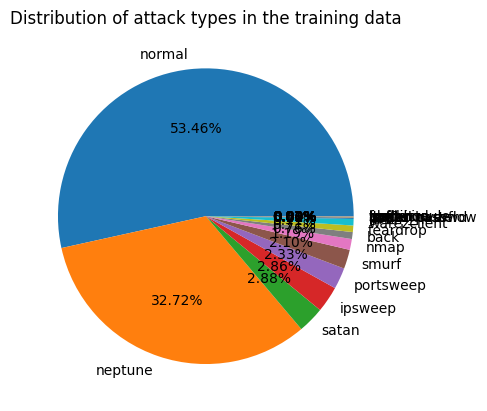

In [52]:
plt.pie(df_attack_type_proportions.proportion, 
        labels = df_attack_type_proportions.attack_type,
        #explode = pie_pieces,
        autopct='%1.2f%%',          # format and display percentages
        #colors=['steelblue', '#E42A38'],
            )
    
plt.title('Distribution of attack types in the training data')
plt.show()

###  Group attack type based on frequency

Summarize attacks that occur in less than 1% to 'other' category (for prettier plotting)

In [63]:
# add new category "other"
df_attack_type_proportions.attack_type = df_attack_type_proportions.attack_type.cat.add_categories(["other"])
# add attack types to category based on their proportion 
df_attack_type_proportions.loc[df_attack_type_proportions.proportion < 0.01, "attack_type"] = 'other'

ValueError: new categories must not include old categories: {'other'}

In [54]:
# sum up values of new category "other" and sort values for plotting
df_reduced_cat = df_attack_type_proportions.groupby("attack_type", observed=True, as_index=False).proportion.sum()
df_reduced_cat.sort_values("proportion", ascending=False, inplace=True)
df_reduced_cat

,attack_type,proportion
3,normal,0.53
1,neptune,0.33
5,satan,0.03
0,ipsweep,0.03
7,other,0.02
4,portsweep,0.02
6,smurf,0.02
2,nmap,0.01


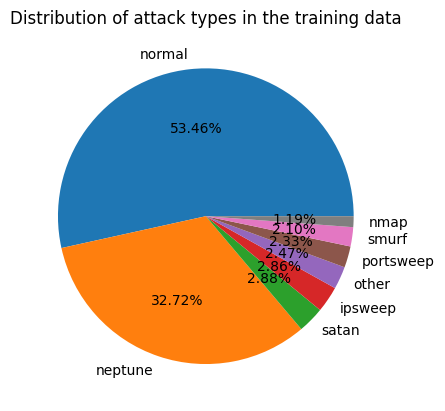

In [55]:
plt.pie(df_reduced_cat.proportion, 
    labels = df_reduced_cat.attack_type,
    #explode = pie_pieces,
    autopct='%1.2f%%',          # format and display percentages
    #colors=['steelblue', '#E42A38'],
        )
    
plt.title('Distribution of attack types in the training data')
plt.show()

### Group attack type by category

Summarize the different attack types into categories of attacks:
1. Denial of Service (DoS)
2. Scanning/Reconnaissance (Probe)
3. Remote to local (R2L)
4. User to Root Escalation (U2R)

In [56]:
# assign attack types to 4 categories + 'normal' and create a new colum attack_categories 

attack_categories = {
    "none": ["normal"],
    "dos": ["back", "land", "neptune", "pod", "smurf", "teardrop", "apache2", "udpstorm", "processtable", "mailbomb"],
    "probe" : ["satan", "ipsweep", "nmap", "portsweep", "mscan", "saint"], 
    "r2l": ["guess_passwd", "ftp_write", "imap", "phf", "multihop", "warezmaster", "warezclient", "spy", "xlock", "xsnoop", "snmpguess", "snmpgetattack", "httptunnel", "sendmail", "named"],
    "u2r" : ["rootkit", "buffer_overflow", "loadmodule", "perl", "sqlattack", "xterm", "ps"],
    }

# using dict comprehension
mapping = {cat: type for type, cats in attack_categories.items() for cat in cats}


In [ ]:
# add new target feature cols to df
train_data["attack_category"]= train_data.attack_type.map(mapping)  # 5 attack ategories (instead of 23)
train_data["attack"]= [0 if x == "normal" else 1 for x in train_data.attack_type] # binary target variable (attack 1, no attack 0)
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level,attack_category,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,none,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,none,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,none,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,none,0


In [ ]:
target_features.add("attack_category")
target_features.add("attack")

# convert to category
train_data = convert_column_type(train_data, list(target_features), 'category') 

train_data.info()

{'attack', 'attack_category', 'attack_type'}

In [61]:
df_attack_cat = train_data.attack_category.value_counts(normalize=True).reset_index()
df_attack_cat

,attack_category,proportion
0,none,0.53
1,dos,0.36
2,probe,0.09
3,r2l,0.01
4,u2r,0.00


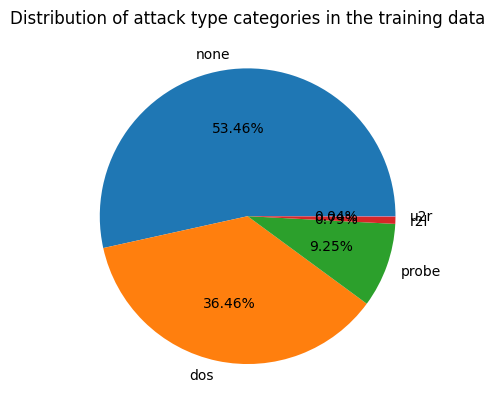

In [62]:
plt.pie(df_attack_cat.proportion, 
        labels = df_attack_cat.attack_category,
        #explode = pie_pieces,
        autopct='%1.2f%%',          # format and display percentages
        #colors=['steelblue', '#E42A38'],
            )
    
plt.title('Distribution of attack type categories in the training data')
plt.show()

## 4.2 Categorial variables (in relation to target variable)

In [73]:
cat_features

{'difficulty_level', 'flag', 'protocol_type', 'service'}

In [64]:
def barplot_by_attack(data_df, feature, target):

    plot_hight = 5
    plot_width = 8

    # count number of unique categories
    n_categories = data_df[feature].nunique()

    #if n_categories > 20:
    #    # only display the top 20 (based on risk)
    #    data_df = data_df.head(20)

    # adjust plot size depending on nr of categories (e.g., 0.5 inch per category, min 8)
    # plt.figure(figsize=(max(8, n_categories * 0.5), plot_hight))
    # plt.figure(figsize=(plot_width, max(plot_hight, n_categories * 0.3)))  # adjust hight

    plt.figure(figsize=(plot_width, plot_hight))  # adjust size 
    ax = sns.barplot(
        data=data_df, 
        x="count", 
        y=feature, 
        hue=target, 
        order=data_df[feature].unique(), # keep feature order of the input df
        palette=[COLOR_1, COLOR_2]
    )
    
    ax.set_title(f"Number of attacks by {feature} (risk descending)")

    # change legend title and labels
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["No attack", "Attack"], title="")

    plt.tight_layout()
    plt.show()


def barplot_percent_attacks(data_df, feature, target): 
    sub_df = data_df[(data_df[target] == 1)]
  
    ax = sns.barplot(
            data=sub_df, 
            x="percent", 
            y=feature,
            order=sub_df[feature].unique(), # keep feature order of the input df
            color=COLOR_2,
    )
    
    ax.set_xlim(0, 100)
    ax.legend = False
    ax.set_title(f"Percent of attacks by {feature} (risk descending)")
    plt.show()

### Feature: `protocol_type`

For protocol_type icmp 84.21% of traffic was an attack (based on 8291 data points).
For protocol_type tcp 47.8% of traffic was an attack (based on 102689 data points).
For protocol_type udp 17.07% of traffic was an attack (based on 14993 data points).


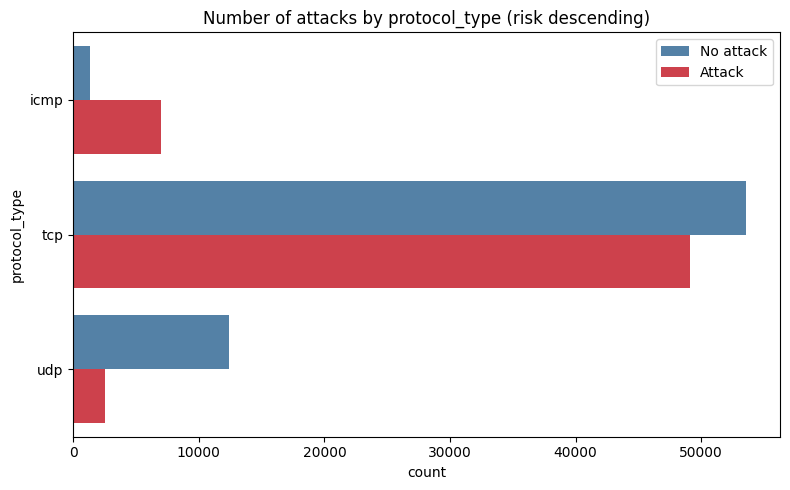

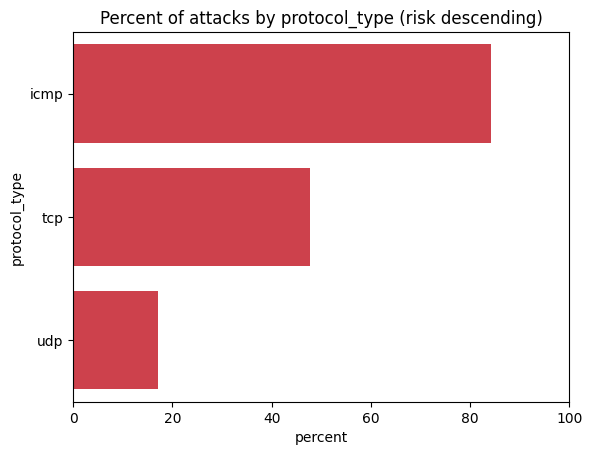

In [70]:
df_protocol_type = aggregate_feature_by_target(train_data, "protocol_type", "attack", verbose=1)
#print(df_protocol_type)
barplot_by_attack(df_protocol_type,"protocol_type", "attack")
# display only the risk
barplot_percent_attacks(df_protocol_type,"protocol_type", "attack")

### Feature: `flag`

For flag RSTOS0 100.0% of traffic was an attack (based on 103 data points).
For flag SH 99.26% of traffic was an attack (based on 271 data points).
For flag S0 98.98% of traffic was an attack (based on 34851 data points).
For flag RSTR 93.97% of traffic was an attack (based on 2421 data points).
For flag RSTO 85.98% of traffic was an attack (based on 1562 data points).
For flag OTH 76.09% of traffic was an attack (based on 46 data points).
For flag REJ 76.03% of traffic was an attack (based on 11233 data points).
For flag SF 15.41% of traffic was an attack (based on 74945 data points).
For flag S3 8.16% of traffic was an attack (based on 49 data points).
For flag S2 6.3% of traffic was an attack (based on 127 data points).
For flag S1 1.1% of traffic was an attack (based on 365 data points).


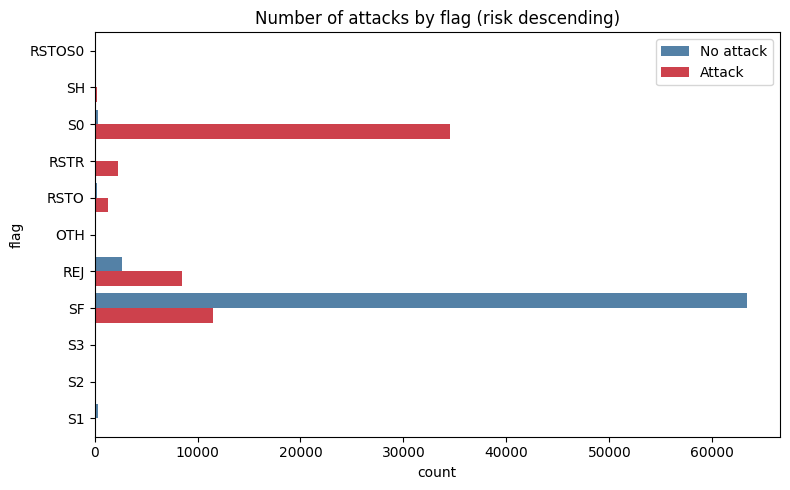

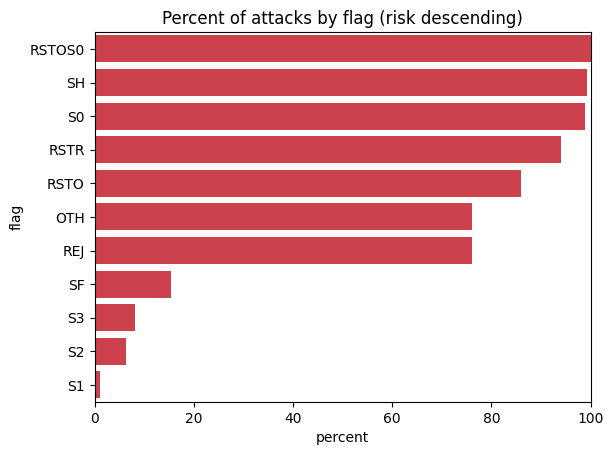

In [71]:
df_flag = aggregate_feature_by_target(train_data, "flag", "attack", verbose=1)
#print(df_flag)
barplot_by_attack(df_flag, "flag", "attack")
# display only the risk 
barplot_percent_attacks(df_flag,"flag", "attack")

### Feature: `service`

In [74]:
df_service = aggregate_feature_by_target(train_data, "service", "attack")
df_service

For service Z39_50 100.0% of traffic was an attack (based on 862 data points).
For service aol 100.0% of traffic was an attack (based on 2 data points).
For service bgp 100.0% of traffic was an attack (based on 710 data points).
For service courier 100.0% of traffic was an attack (based on 734 data points).
For service csnet_ns 100.0% of traffic was an attack (based on 545 data points).
For service ctf 100.0% of traffic was an attack (based on 563 data points).
For service daytime 100.0% of traffic was an attack (based on 521 data points).
For service discard 100.0% of traffic was an attack (based on 538 data points).
For service echo 100.0% of traffic was an attack (based on 434 data points).
For service efs 100.0% of traffic was an attack (based on 485 data points).
For service exec 100.0% of traffic was an attack (based on 474 data points).
For service gopher 100.0% of traffic was an attack (based on 518 data points).
For service harvest 100.0% of traffic was an attack (based on 2 d

,service,attack,count,percent
4,Z39_50,1,862,100.00
6,aol,1,2,100.00
10,bgp,1,710,100.00
12,courier,1,734,100.00
14,csnet_ns,1,545,100.00
...,...,...,...,...
119,systat,0,0,0.00
133,uucp,0,0,0.00
135,uucp_path,0,0,0.00
137,vmnet,0,0,0.00


For 44 services 100% of the traffic was an attack.


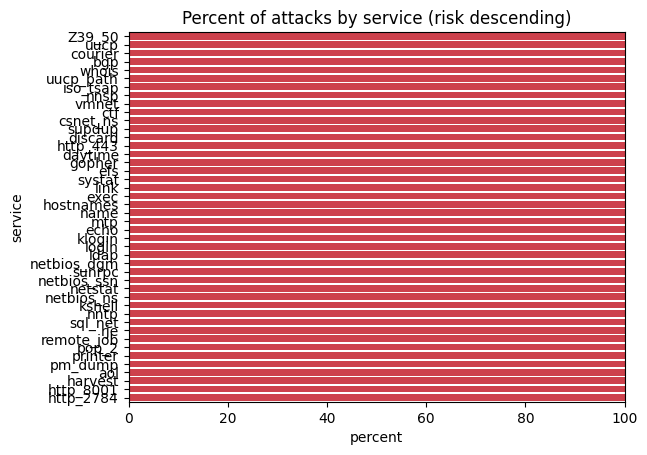

In [85]:
# there are too many categories to display, let's look at all services with 100% attack rate vs other
# 1 get all services with 100% attacks 
attack_risk_100 = df_service[(df_service["percent"] == 100 ) & (df_service["attack"] == 1)]
# sort them by nr of occurences
attack_risk_100 = attack_risk_100.sort_values("count", ascending=False)

print( f"For {len(attack_risk_100)} services 100% of the traffic was an attack.")
barplot_percent_attacks(attack_risk_100, "service", "attack")

For 26 services less than 100% of the traffic was an attack.


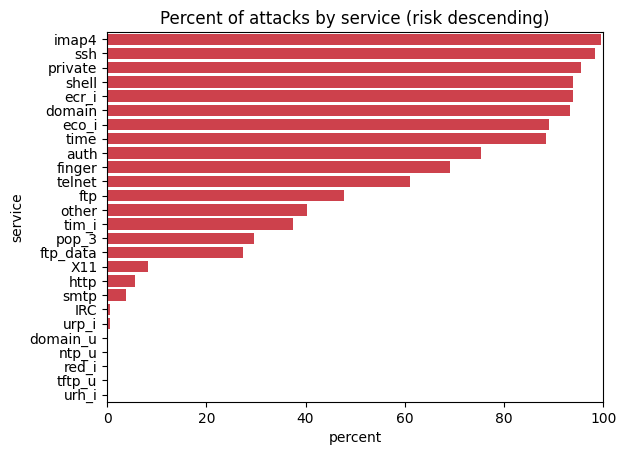

In [ ]:
# 2. next, look at the services where less than 100% of traffic was an attack
attack_risk_less = df_service[(df_service["percent"] < 100 ) & (df_service["attack"] == 1)]
print( f"For {len(attack_risk_less)} services less than 100% of the traffic was an attack.")
#print(attack_risk_less)
barplot_percent_attacks(attack_risk_less, "service", "attack")
# all other services have a 100 risk! 

### Feature: `difficulty_level`

For difficulty_level 0 100.0% of traffic was an attack (based on 66 data points).
For difficulty_level 2 96.3% of traffic was an attack (based on 54 data points).
For difficulty_level 1 95.16% of traffic was an attack (based on 62 data points).
For difficulty_level 15 94.24% of traffic was an attack (based on 3990 data points).
For difficulty_level 3 93.85% of traffic was an attack (based on 65 data points).
For difficulty_level 6 91.67% of traffic was an attack (based on 96 data points).
For difficulty_level 11 90.8% of traffic was an attack (based on 641 data points).
For difficulty_level 4 88.61% of traffic was an attack (based on 79 data points).
For difficulty_level 8 87.74% of traffic was an attack (based on 106 data points).
For difficulty_level 16 87.17% of traffic was an attack (based on 2393 data points).
For difficulty_level 10 84.19% of traffic was an attack (based on 253 data points).
For difficulty_level 12 83.4% of traffic was an attack (based on 729 data points).
For di

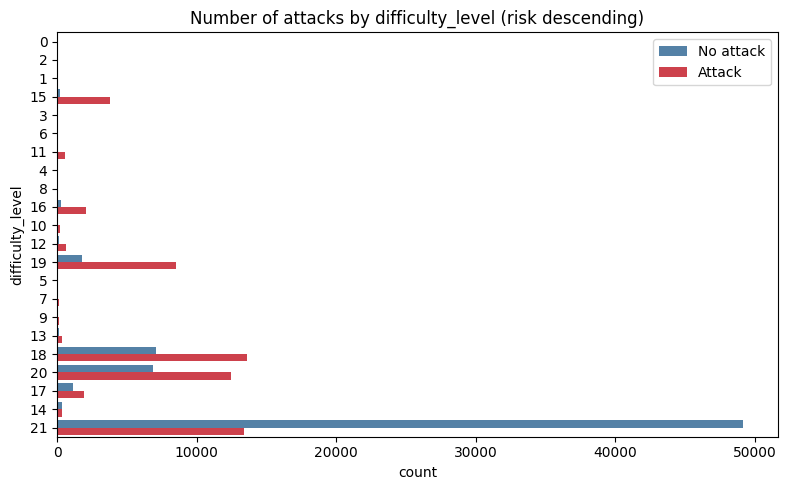

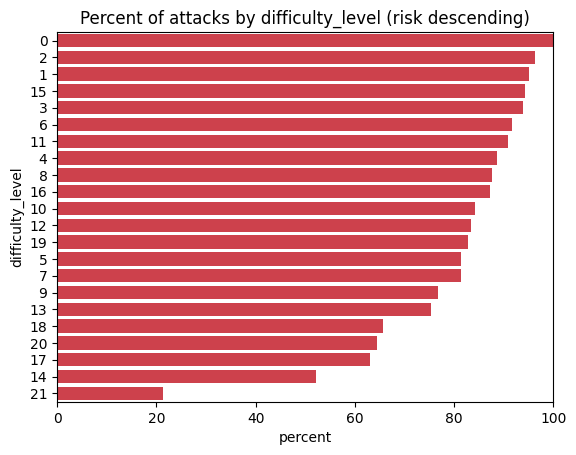

In [90]:
df_wf = aggregate_feature_by_target(train_data, "difficulty_level", "attack")
barplot_by_attack(df_wf,"difficulty_level", "attack" )
barplot_percent_attacks(df_wf, "difficulty_level", "attack")

Comment: On the highest difficulty level, there is the most traffic with the smalles attack rate

In [91]:
list_cat_feat

['flag', 'protocol_type', 'service', 'difficulty_level']

## 4.3 Features: `bool`

Take a quick look at the boolean features 

For logged_in 0 74.4% of traffic was an attack (based on 76121 data points).
For logged_in 1 4.0% of traffic was an attack (based on 49852 data points).


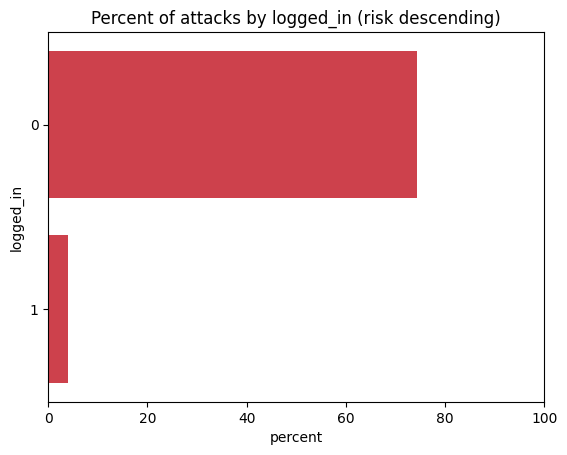



For root_shell 0 46.58% of traffic was an attack (based on 125804 data points).
For root_shell 1 18.93% of traffic was an attack (based on 169 data points).


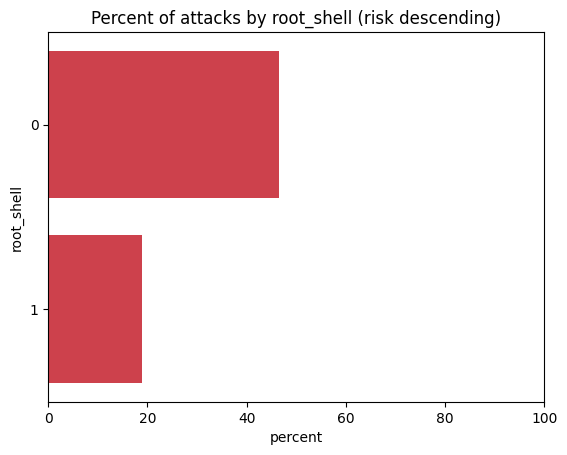



For is_guest_login 0 46.73% of traffic was an attack (based on 124786 data points).
For is_guest_login 1 26.45% of traffic was an attack (based on 1187 data points).


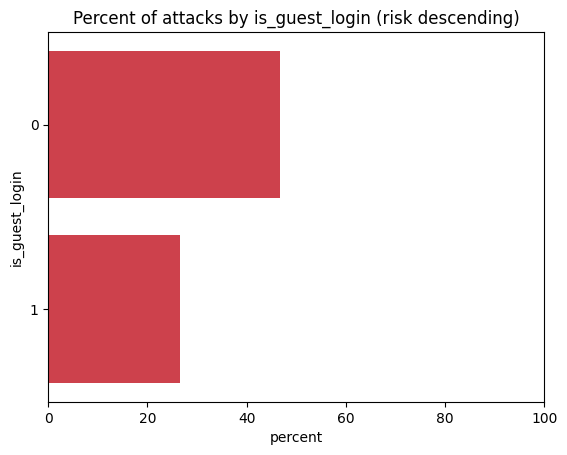



For land 1 72.0% of traffic was an attack (based on 25 data points).
For land 0 46.54% of traffic was an attack (based on 125948 data points).


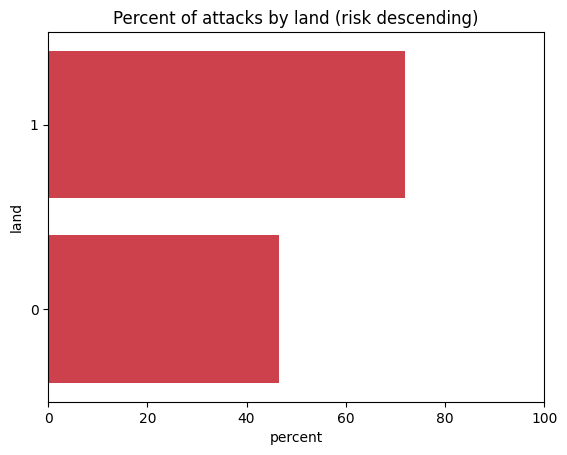



For is_host_login 0 46.54% of traffic was an attack (based on 125972 data points).
For is_host_login 1 0.0% of traffic was an attack (based on 1 data points).


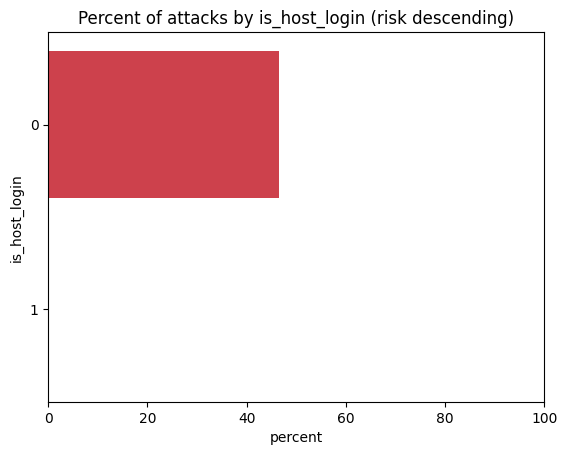

In [92]:
for feature in list_bool_feat: 
    df= aggregate_feature_by_target(train_data, feature, "attack")
    barplot_percent_attacks(df,feature,"attack" )
    print("\n")

## Numerical features

In [89]:
num_features

{'count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'duration',
 'hot',
 'rerror_rate',
 'same_srv_rate',
 'serror_rate',
 'src_bytes',
 'srv_count',
 'srv_diff_host_rate',
 'srv_rerror_rate',
 'srv_serror_rate'}

In [93]:
train_data.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,num_root,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,"125,973.00","125,973.00","125,973.00","125,973.00","125,973.00","125,973.00","125,973.00","125,973.00","125,973.00","125,973.00",...,"125,973.00","125,973.00","125,973.00","125,973.00","125,973.00","125,973.00","125,973.00","125,973.00","125,973.00","125,973.00"
mean,287.14,"45,566.74","19,779.11",0.02,0.00,0.20,0.00,0.28,0.00,0.30,...,182.15,115.65,0.52,0.08,0.15,0.03,0.28,0.28,0.12,0.12
std,"2,604.52","5,870,331.18","4,021,269.15",0.25,0.01,2.15,0.05,23.94,0.05,24.40,...,99.21,110.70,0.45,0.19,0.31,0.11,0.44,0.45,0.31,0.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,82.00,10.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,44.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,255.00,63.00,0.51,0.02,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,276.00,516.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,255.00,255.00,1.00,0.07,0.06,0.02,1.00,1.00,0.00,0.00
max,"42,908.00","1,379,963,888.00","1,309,937,401.00",3.00,3.00,77.00,5.00,"7,479.00",2.00,"7,468.00",...,255.00,255.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [94]:
def plot_numerical_by_target(data_df, feature, target):
    ax = sns.violinplot(
                x=target, 
                y=feature, 
                data=data_df,
                hue=target,
                palette=[COLOR_1, COLOR_2])
    
    # change x axis ticks and label
    ax.set_xticks([0, 1])  
    ax.set_xticklabels(["No Attack", "Attack"])
    ax.set_xlabel("") 

    # suppress legend
    plt.legend([], [], frameon=False)
    plt.title(f"Distribution of {feature} by {target}")
    plt.show()

def hist_by_target(data_df, feature, target):
    data_df["target_label"] = data_df[target].map({0: "No Attack", 1: "Attack"})
    ax = sns.histplot(
                data=data_df,
                x=feature, 
                hue="target_label",
                palette=[COLOR_1, COLOR_2],
                kde=True, 
                element="step", 
                stat="density")
    
    #ax.legend(title="")
    
    plt.title(f"Histogram of {feature} by {target}")
    plt.show()

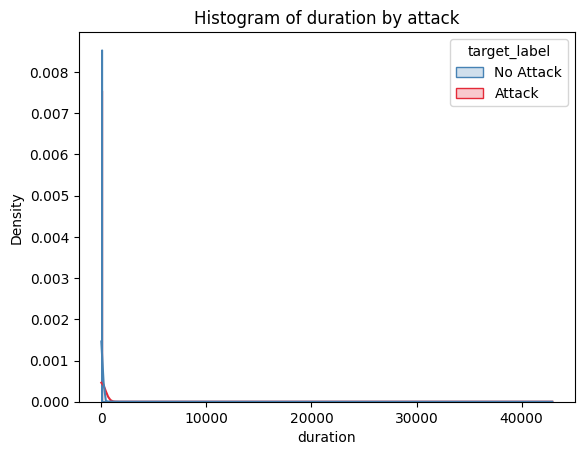

In [95]:
hist_by_target(train_data, "duration", "attack")

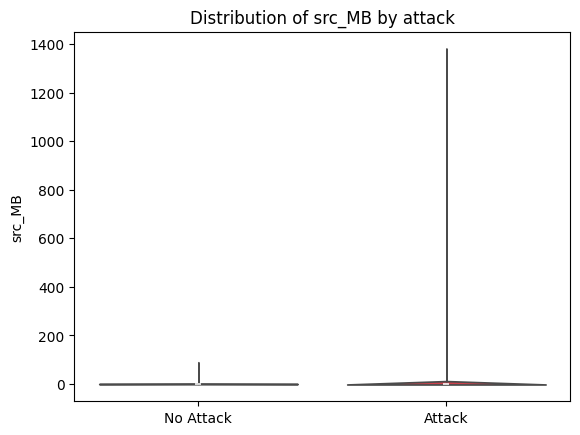

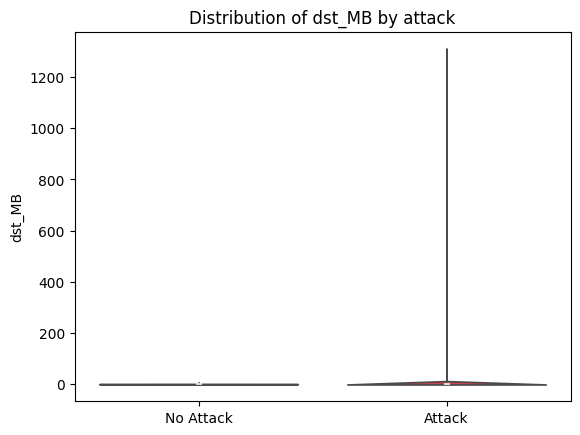

In [ ]:
# create new features from byte features 
# 1e3 = KB, 1e6 = MB 1e9 = GB
train_data["src_MB"] = train_data.src_bytes / 1e6
train_data["dst_MB"] = train_data.dst_bytes / 1e6
train_data["src_GB"] = train_data.src_bytes / 1e9
train_data["dst_GB"] = train_data.dst_bytes / 1e9


plot_numerical_by_target(train_data, "src_MB", "attack")
plot_numerical_by_target(train_data, "dst_MB", "attack")


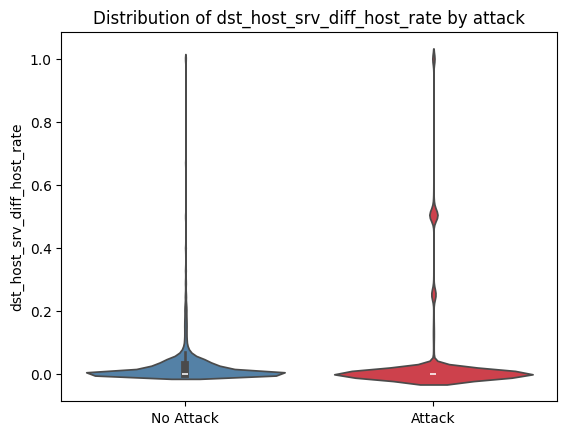

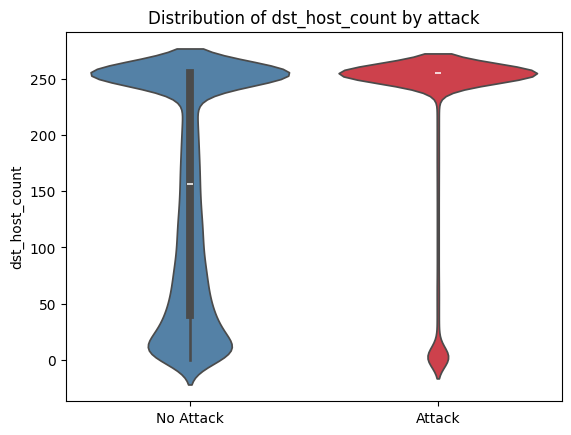

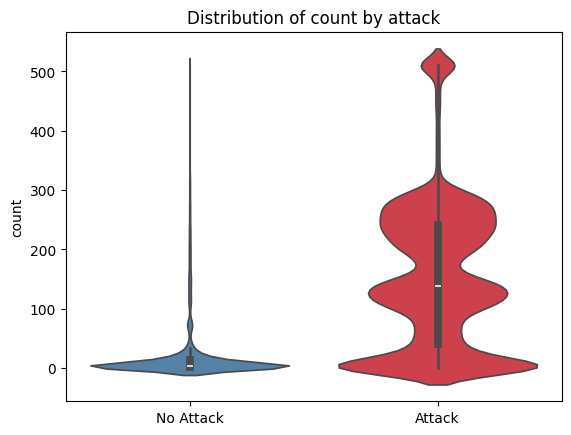

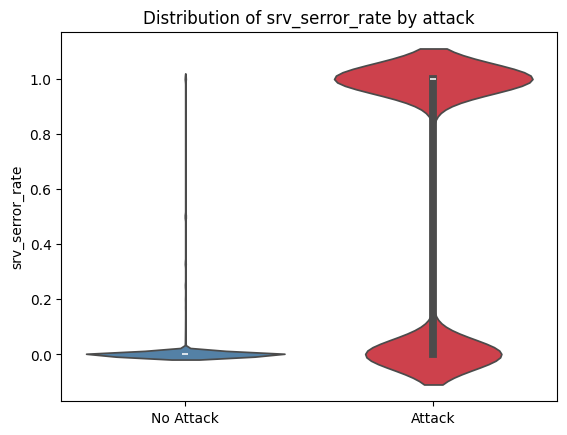

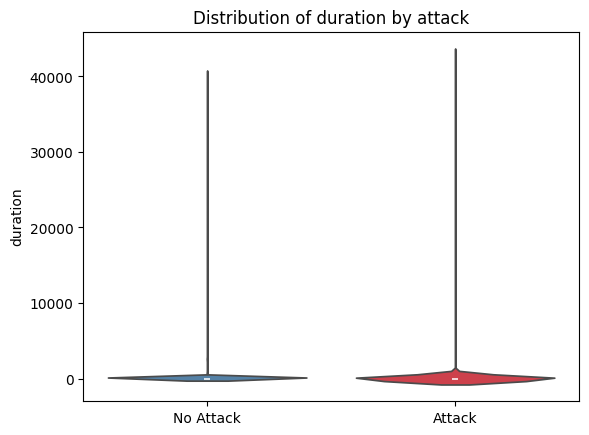

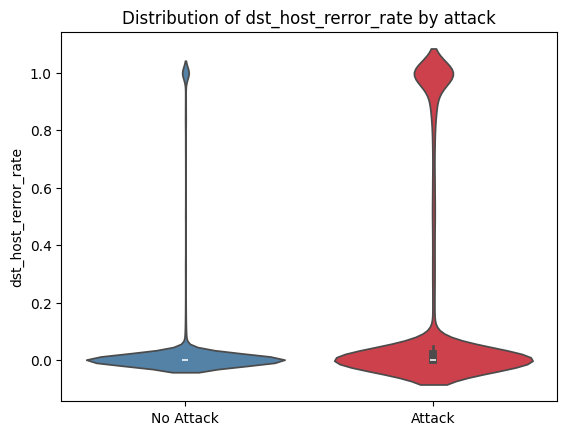

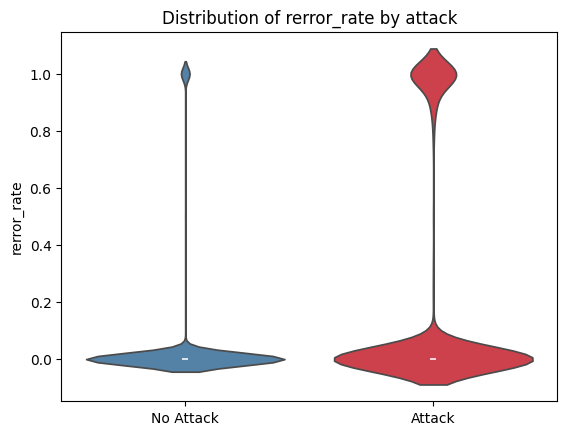

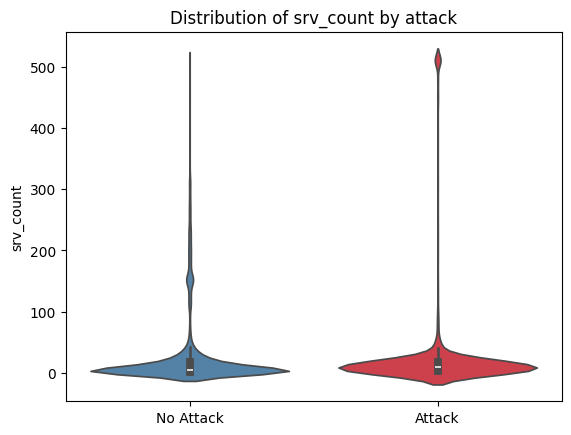

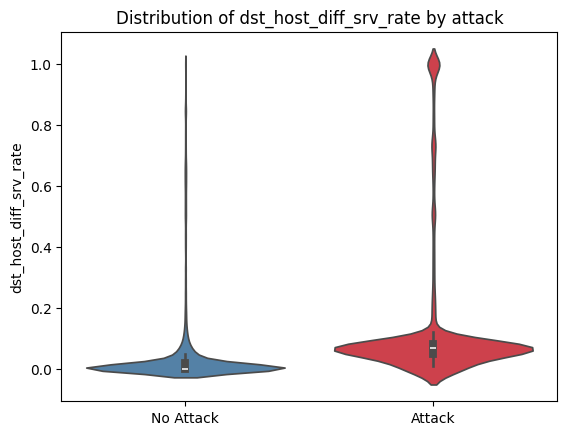

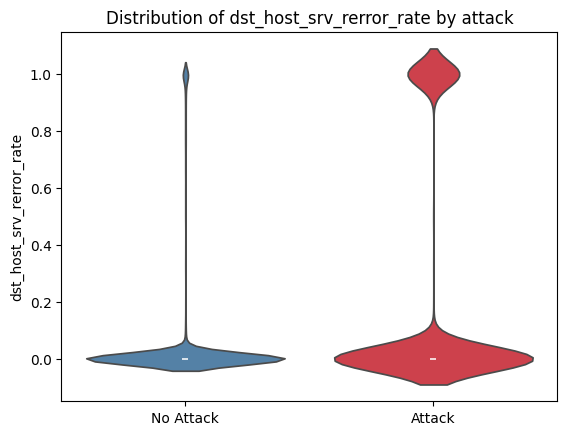

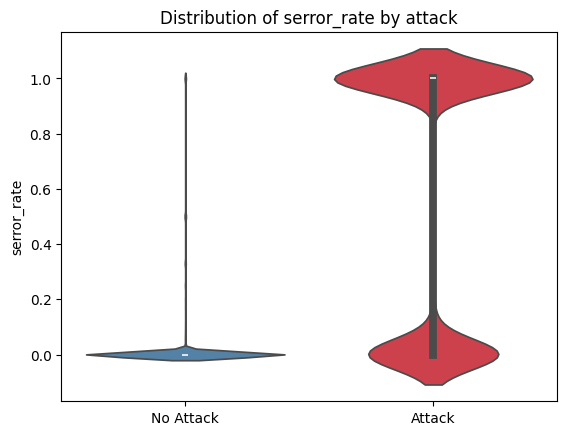

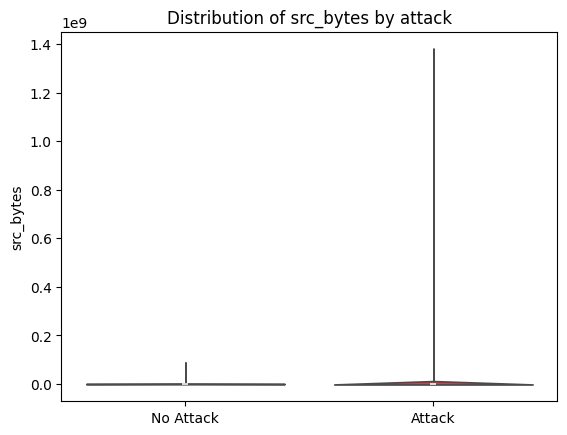

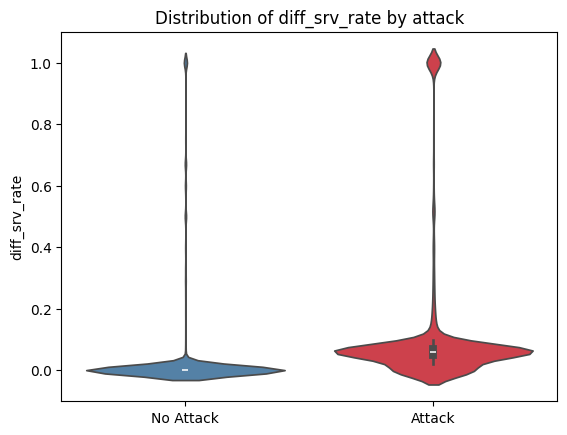

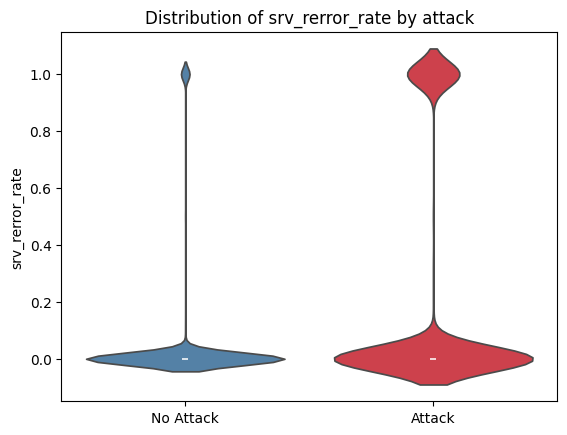

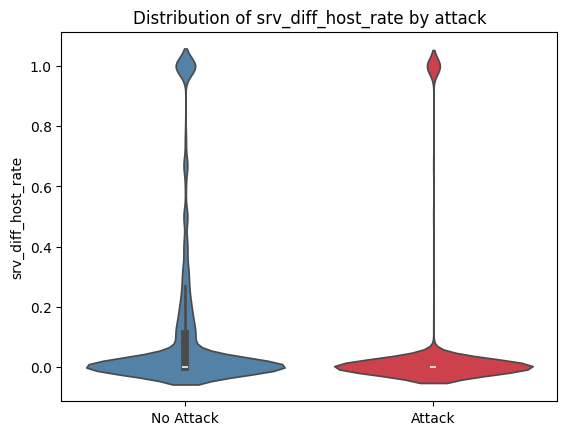

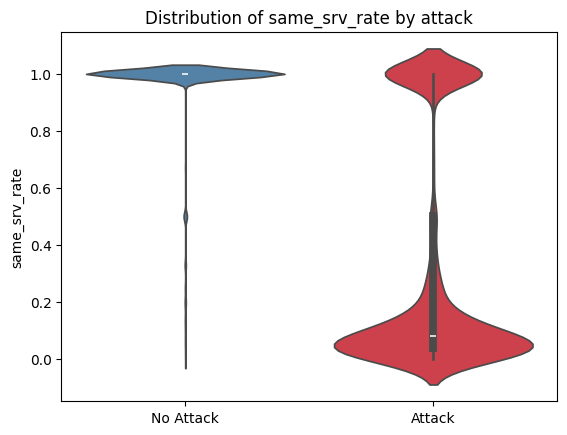

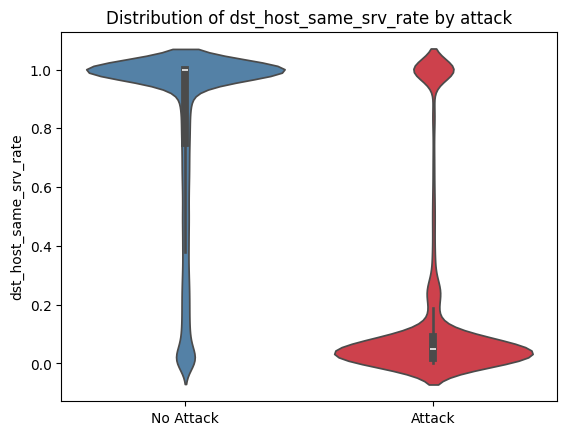

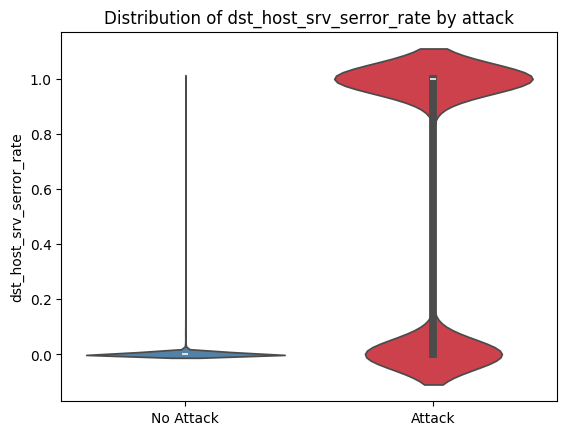

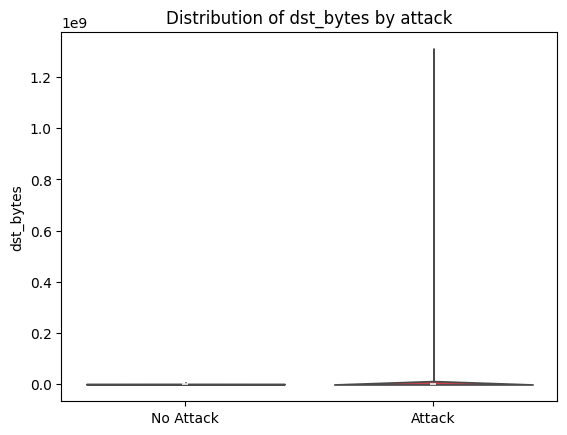

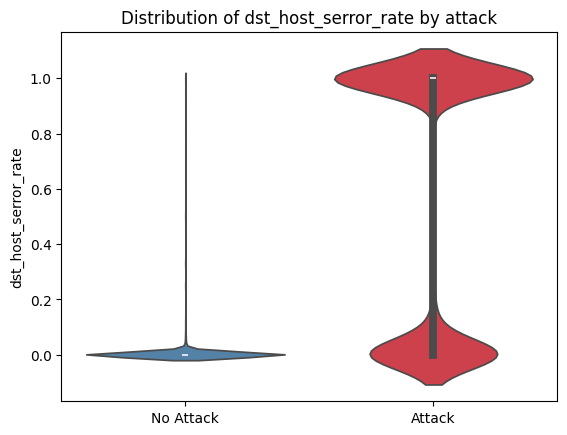

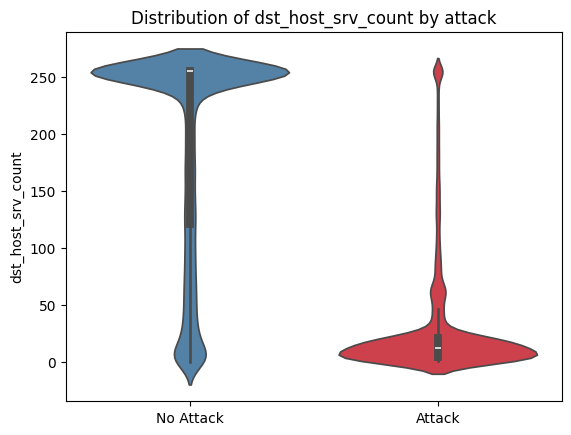

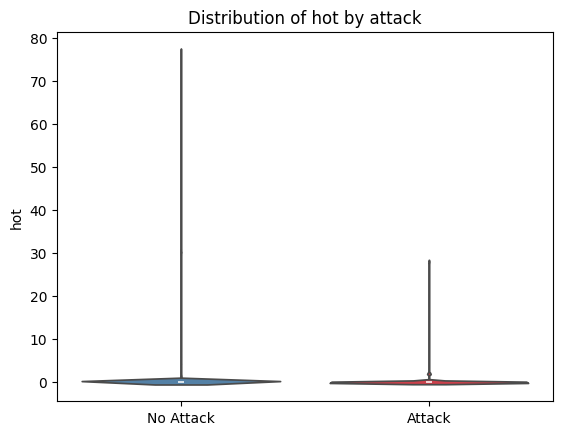

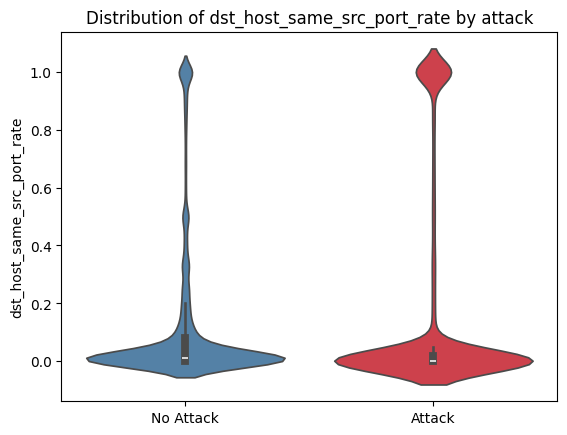

In [97]:
# Inspect dist of numerical features grouped by target 
# for tree based models skewed distributions do not matter 
for feature in list_num_feat:
    plot_numerical_by_target(train_data, feature, "attack")

## Features to recode 

In [98]:
def recode_feature_zero_vs_other(data_df, old_feature, new_feature, treshold=0.995):
    print("-----"*15)
    print(f"+++ Processing feature {old_feature} ... +++ \n")
    
    # prior check that the most frequent expression must occur most freq than theshold
    value_proportions = data_df[old_feature].value_counts(normalize=True).reset_index()
    if value_proportions.head(1).proportion.values[0] > treshold:
        print(f"The most frequent value is {value_proportions.head(1)[old_feature].values[0]} with {value_proportions.head(1).proportion.values[0]}%.")
        print(f"There are {len(value_proportions)} different values in total.")
        print("Proceeding with recoding to category.\n")
    else:
        print(f"The value {value_proportions.head(1)[old_feature].values[0]} occurs {value_proportions.head(1).proportion.values[0]}%.")
        print(f"No recoding done, optionally change threshold for most frequent value: {treshold}.\n")
        return

    # recode to 0 vs "other"
    data_df[new_feature]= [x if x == 0 else "other" for x in train_data[old_feature]]
    
    # check new category
    print("New category:\n")
    print(data_df[new_feature].value_counts())
    
    # convert to categorical 
    data_df = convert_column_type(data_df, new_feature, 'category') 
    
    # add to categorical variabls 
    cat_features.add(new_feature)

    # add former col to cols to drop set
    drop_features.add(old_feature)

    # remove former col from recode feature set
    recode_features.discard(old_feature)
    return

In [99]:
# numerical variables with one dominant value and small nr of other values : 
# treat as categorical variable where rare values (e.g. other than 0) are regrouped to other
list_recode_feat

['urgent',
 'num_file_creations',
 'num_shells',
 'wrong_fragment',
 'num_root',
 'num_access_files',
 'num_failed_logins',
 'num_compromised',
 'su_attempted']

In [100]:
for feature in list(recode_features):
    new_feature = feature + "_cat"
    recode_feature_zero_vs_other(train_data, feature, new_feature)

---------------------------------------------------------------------------
+++ Processing feature urgent ... +++ 

The most frequent value is 0 with 0.9999285561191684%.
There are 4 different values in total.
Proceeding with recoding to category.

New category:

urgent_cat
0        125964
other         9
Name: count, dtype: int64
---------------------------------------------------------------------------
+++ Processing feature num_file_creations ... +++ 

The most frequent value is 0 with 0.9977217340223699%.
There are 35 different values in total.
Proceeding with recoding to category.

New category:

num_file_creations_cat
0        125686
other       287
Name: count, dtype: int64
---------------------------------------------------------------------------
+++ Processing feature num_shells ... +++ 

The most frequent value is 0 with 0.9996269041778794%.
There are 3 different values in total.
Proceeding with recoding to category.

New category:

num_shells_cat
0        125926
other     

### Feature `num_shells`

In [102]:
# treat as categorical variable where rare values (everything other than 0 ) are regrouped to other
df_ns = train_data.num_shells.value_counts().reset_index()
df_ns


,num_shells,count
0,0,125926
1,1,42
2,2,5


### Feature `urgent`

In [103]:
train_data.urgent.value_counts()

urgent
0    125964
1         5
2         3
3         1
Name: count, dtype: int64

### Feature `num_failed_logins`:

In [104]:
train_data.num_failed_logins.value_counts()

num_failed_logins
0    125851
1       104
2         9
3         5
4         3
5         1
Name: count, dtype: int64

### Feature `num_access_files`

In [105]:
train_data.num_file_creations.value_counts()

num_file_creations
0     125686
1        151
2         41
4         13
8          5
15         5
5          5
17         5
3          5
10         5
11         4
12         4
7          4
18         4
40         3
25         3
14         3
20         3
6          3
26         3
9          2
23         2
13         2
21         1
29         1
19         1
27         1
28         1
16         1
38         1
33         1
22         1
43         1
36         1
34         1
Name: count, dtype: int64

In [193]:
train_data.num_compromised.value_counts()

num_compromised
0      124687
1         976
2          98
4          40
3          38
        ...  
568         1
349         1
452         1
375         1
11          1
Name: count, Length: 88, dtype: int64

In [107]:
train_data.num_file_creations.value_counts()

num_file_creations
0     125686
1        151
2         41
4         13
8          5
15         5
5          5
17         5
3          5
10         5
11         4
12         4
7          4
18         4
40         3
25         3
14         3
20         3
6          3
26         3
9          2
23         2
13         2
21         1
29         1
19         1
27         1
28         1
16         1
38         1
33         1
22         1
43         1
36         1
34         1
Name: count, dtype: int64

In [ ]:
# these are the features that were not "automatically" recoded to categorical variable with 0 vs other
recode_features


{'num_compromised', 'num_root', 'wrong_fragment'}

In [ ]:
# do not forget to drop the old features, that have been recoded to categories 
drop_features

{'num_access_files',
 'num_failed_logins',
 'num_file_creations',
 'num_outbound_cmds',
 'num_shells',
 'su_attempted',
 'urgent'}

In [ ]:
# look at the remaining ones 

### Feature: `num_compromised`

In [134]:
tt = train_data.num_compromised.value_counts(normalize=False).reset_index()
tt

,num_compromised,count
0,0,124687
1,1,976
2,2,98
3,4,40
4,3,38
...,...,...
83,568,1
84,349,1
85,452,1
86,375,1


In [187]:
print(f"For the feature num_compromised there are {len(tt[tt['count'] >= 3])} conditions with up to 3 compromized conditions.\n")
print(tt[tt["count"] >= 3])


For the feature num_compromised there are 10 conditions with up to 3 compromized conditions.

   num_compromised   count
0                0  124687
1                1     976
2                2      98
3                4      40
4                3      38
5                6      19
6                5      17
7                7       5
8                9       3
9                8       3


In [188]:
print(tt[tt["count"] < 3])

    num_compromised  count
10               31      2
11              371      2
12               12      2
13               13      2
14              884      2
..              ...    ...
83              568      1
84              349      1
85              452      1
86              375      1
87               11      1

[78 rows x 2 columns]


In [189]:
# manually encode a new feature with 3 categories 
cond = [train_data["num_compromised"] == 0,
    (train_data["num_compromised"] >= 1) & (train_data["num_compromised"] <= 10),
    train_data["num_compromised"] > 10
]
cond

nr_comromised = ["none", "low", "high"]
train_data["num_compromised_cat"] = np.select(cond, nr_comromised, default="unknown")

convert_column_type(train_data, "num_compromised_cat", str )
convert_column_type(train_data, "num_compromised_cat", 'category' )


print(train_data[["num_compromised", "num_compromised_cat"]].head())

   num_compromised num_compromised_cat
0                0                none
1                0                none
2                0                none
3                0                none
4                0                none


In [173]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     125973 non-null  int64   
 1   protocol_type                125973 non-null  category
 2   service                      125973 non-null  category
 3   flag                         125973 non-null  category
 4   src_bytes                    125973 non-null  int64   
 5   dst_bytes                    125973 non-null  int64   
 6   land                         125973 non-null  category
 7   wrong_fragment               125973 non-null  int64   
 8   urgent                       125973 non-null  int64   
 9   hot                          125973 non-null  int64   
 10  num_failed_logins            125973 non-null  int64   
 11  logged_in                    125973 non-null  category
 12  num_compromised              125973 non-null

In [174]:
train_data.num_compromised_cat.value_counts()

num_compromised_cat
none    124687
low       1201
high        85
Name: count, dtype: int64

For num_compromised_cat low 75.85% of traffic was an attack (based on 1201 data points).
For num_compromised_cat none 46.29% of traffic was an attack (based on 124687 data points).
For num_compromised_cat high 3.53% of traffic was an attack (based on 85 data points).


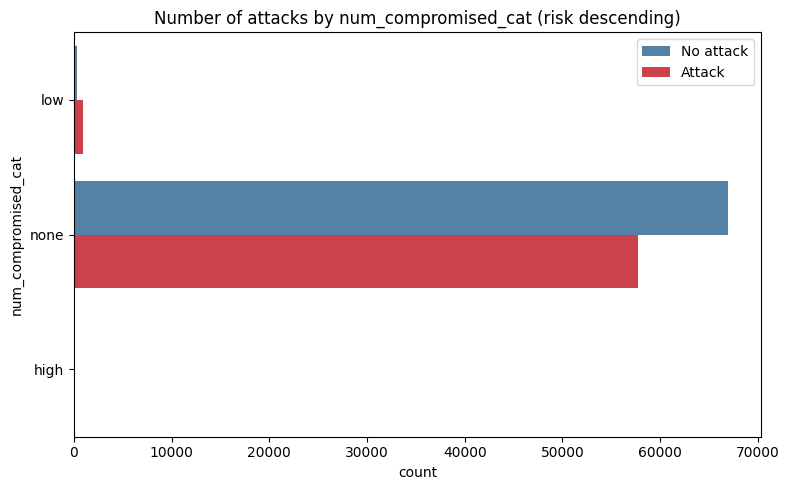

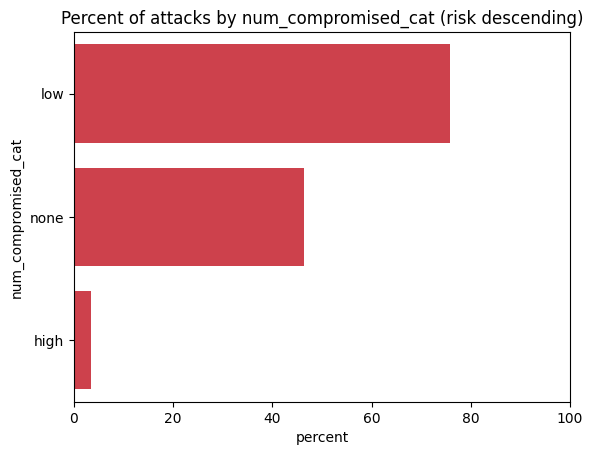

In [185]:
df_num_comp= aggregate_feature_by_target(train_data,"num_compromised_cat", "attack" )
barplot_by_attack(df_num_comp, "num_compromised_cat", "attack")
barplot_percent_attacks(df_num_comp, "num_compromised_cat", "attack")

In [191]:
recode_features.discard("num_compromised")

In [192]:
recode_features

{'num_root', 'wrong_fragment'}

### Feature `num_root`

In [194]:
train_data.num_root.value_counts()

num_root
0      125324
1         273
9         121
6          99
2          33
        ...  
287         1
626         1
387         1
505         1
425         1
Name: count, Length: 82, dtype: int64